Mittelwert: 17.3 Fehler: 1.2
A1= 295.0 , Standardfehler= 23.0
l1= 0.0314 , Standardfehler= 0.0044
A2= 65.0 , Standardfehler= 16.0
l2= 0.00457 , Standardfehler= 0.00099
chi2= 48.0
chi2_red= 1.34
Wahrscheinlichkeit erster Fit= 8.0 %


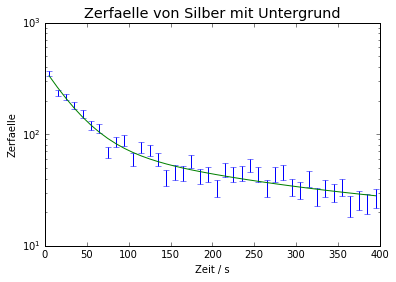

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.style as psy
#Silberzerfall
unterg = np.loadtxt('Untergrund.dat', usecols = [1])
mittelw_unterg = np.mean(4*unterg)
fehler_unterg = np.std(4*unterg) / np.sqrt(len(unterg))
print("Mittelwert:" , round(mittelw_unterg,1), "Fehler:" , round(fehler_unterg,1))

n1 = np.loadtxt('Silber1.dat' , usecols = [1])
n2 = np.loadtxt('Silber2.dat' , usecols = [1])
n3 = np.loadtxt('Silber3.dat' , usecols = [1])
n4 = np.loadtxt('Silber4.dat' , usecols = [1])
n5 = np.zeros(40)
j=0
for i in range (0, 400):    
    if (i % 10 == 0 and i != 0):       
        j += 1
    n5[j] += n4[i]               

N = n2[:40] + n3[:40]  + n1[:40]  + n5[:40]
Fehler_N = np.sqrt(N)

t= np.arange(5, 405, 10)
plt.errorbar(t, N, yerr=Fehler_N, linestyle = 'None')
psy.use('classic')
plt.xlabel("Zeit / s")
plt.ylabel("Zerfaelle")
plt.title("Zerfaelle von Silber mit Untergrund")
plt.yscale("log")

y0 = mittelw_unterg   # Untergrund      # +- fehler_unterg
def fit_func(x, A1, l1, A2, l2):
    return A1*np.exp(-x*l1) + A2*np.exp(-x*l2) + y0

from scipy.optimize import curve_fit
popt, pcov = curve_fit(fit_func, t, N, p0 = [295, 0.03, 65, 0.005], sigma = Fehler_N)

plt.plot(t, fit_func(t, *popt), label='Untergrund')
plt.savefig("Silber.pdf", format = "pdf")

print("A1=", round(popt[0]), ", Standardfehler=", round(np.sqrt(pcov[0][0])))
print("l1=", round(popt[1],4), ", Standardfehler=", round(np.sqrt(pcov[1][1]),4))
print("A2=", round(popt[2]), ", Standardfehler=", round(np.sqrt(pcov[2][2])))
print("l2=", round(popt[3],5), ", Standardfehler=", round(np.sqrt(pcov[3][3]),5))

l1 = popt[1]
l2 = popt[3]

l1_fehler = np.sqrt(pcov[1][1])
l2_fehler = np.sqrt(pcov[3][3])

chi2_ = np.sum((fit_func(t, *popt) - N)**2 / Fehler_N**2)
dof = len(N) - 4 
chi2_red = chi2_ / dof
print("chi2=", round(chi2_))
print("chi2_red=", round(chi2_red,2))

from scipy.stats import chi2
prob = round(1 - chi2.cdf(chi2_, dof), 2)*100
print("Wahrscheinlichkeit erster Fit=", prob, "%")

Mittelwert: 52.0 Fehler: 3.7
A=7.01e+02 , Standardfehler=1.3e+01
l= 0.0002188 , Standardfehler= 1.1e-05
chi2= 39.0
chi2_red= 1.77
Fitwahrscheinlichkeit= 1.4 %


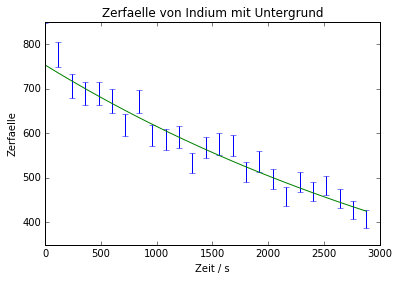

In [53]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

#Indiumzerfall

unterg = np.loadtxt('Untergrund.dat', usecols = [1])
mittelw_unterg = 12*np.mean(unterg)
fehler_unterg = 12*np.std(unterg) / np.sqrt(len(unterg))
print("Mittelwert:" , mittelw_unterg, "Fehler:" , round(fehler_unterg,1))

N = np.loadtxt('Indium.dat' , usecols = [1])[:-1]
Fehler_N = np.sqrt(N)

t= np.arange(0, len(N)*120, 120)

plt.errorbar(t, N, Fehler_N, linestyle = 'None')
plt.xlabel("Zeit / s")
plt.ylabel("Zerfaelle")
plt.title("Zerfaelle von Indium mit Untergrund")
plt.ylim(350, 850)

y0 = mittelw_unterg            #Untergrund
def fit_func(x, A, l):
    return A*np.exp(-x*l) + y0

from scipy.optimize import curve_fit
popt, pcov = curve_fit(fit_func, t[1:], N[1:], p0 = [800, 0.0002], sigma = Fehler_N[1:])
plt.plot(t, fit_func(t, *popt))
plt.show()
#plt.savefig("Indium.pdf", format = "pdf")

print("A={v:.3}".format(v = popt[0]), ", Standardfehler={v:.2}".format(v = np.sqrt(pcov[0][0])))
print("l=", round(popt[1],7), ", Standardfehler=", round(np.sqrt(pcov[1][1]),6))

l1_fehler = np.sqrt(pcov[1][1])

chi2_ = np.sum((fit_func(t, *popt) - N)**2 / Fehler_N**2)
dof = len(N)-1 - 2 
chi2_red = chi2_ / dof
print("chi2=", round(chi2_))
print("chi2_red=", round(chi2_red,2))

from scipy.stats import chi2
prob = round(1 - chi2.cdf(chi2_, dof), 4)*100
print("Fitwahrscheinlichkeit=", prob, "%")